In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load the data
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

Since the targets are 2D array N x 1 instead of N. Therefore, we need to flatten it.

In [ ]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
y_train.shape

(50000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
# Build the model using functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
# Dense layers NN design commences here
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x) # Output layer

# Once we have the variable representing the input "i"
# and the variable representing the output "x",
# we can pass these into the Model() constructor

model = Model(i,x)

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5887 - accuracy: 0.4225 - val_loss: 1.2978 - val_accuracy: 0.5250
Epoch 2/15
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2790 - accuracy: 0.5387 - val_loss: 1.1030 - val_accuracy: 0.6080
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1445 - accuracy: 0.5870 - val_loss: 1.0411 - val_accuracy: 0.6327
Epoch 4/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0562 - accuracy: 0.6219 - val_loss: 0.9774 - val_accuracy: 0.6526
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9890 - accuracy: 0.6474 - val_loss: 0.9581 - val_accuracy: 0.6681
Epoch 6/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9310 - accuracy: 0.6694 - val_loss: 0.9004 - val_accuracy: 0.6835
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8816 - accuracy: 0.6863 - val_loss: 0.8779 -

Observation: We get an accuracy of around 77.14%. SO its clearer now that CIFAR10 is an even more difficult dataset than MNIST and Fashion MNIST.

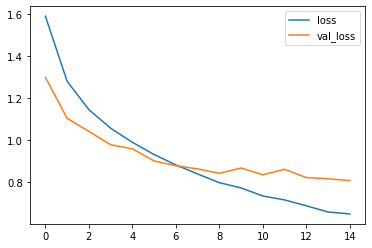

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Observation:

Again, we see that the model if Overfitting and it will increase to overfit more if we run it for more number of epochs.

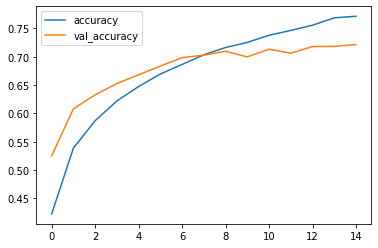

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Observation:

We can see that the training accuracy has not yet converged while the validation accuracy has become steady. This is another sign that our model is overfitting and learning only the noise in the data.

Confusion matrix, without normalization
[[733  17  56  17  18  10  13  14  87  35]
 [ 13 843   5  10   6   4  15   2  30  72]
 [ 45   6 587  92  85  55  72  39  14   5]
 [ 17   8  52 551  54 189  69  35  14  11]
 [ 15   5  62  79 635  50  65  73  12   4]
 [  8   3  50 188  48 621  27  50   1   4]
 [  8   3  24  75  28  25 825   8   4   0]
 [ 10   4  26  46  36  61   6 798   5   8]
 [ 44  28  12  17  11  10   9   2 847  20]
 [ 33  84  13  25   2   6  12  18  32 775]]


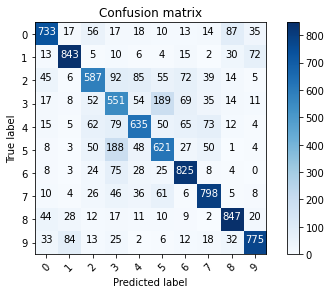

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

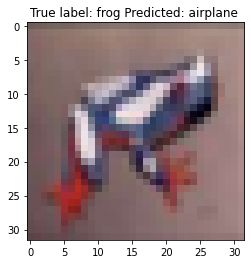

In [ ]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

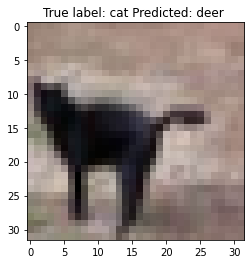

In [ ]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

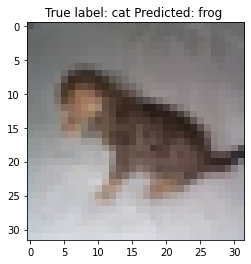

In [ ]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));